In [5]:
import pandas as pd
import numpy as np

# US or AG
COUNTRY = 'AG'
# corn, soybean, wheat, sunflower
CROP_TYPE = 'corn'  # Default is corn, can be changed to 'soybean' or 'wheat'

VALID_CROP_TYPES = {
    'US': ['corn', 'soybean', 'winter_wheat'],
    'AG': ['wheat', 'soybean', 'corn', 'sunflower']
}

if CROP_TYPE not in VALID_CROP_TYPES[COUNTRY]:
    raise ValueError(f"Invalid crop type: {CROP_TYPE}. Valid crop types are: {VALID_CROP_TYPES[COUNTRY]}")


US_DATASET_FILE = '../data/khaki_soybeans/khaki_multi_crop_yield.csv'
AG_DATASET_FILE = '../data/khaki_soybeans/khaki_argentina_multi_crop.csv'

DATASET_FILE = AG_DATASET_FILE if COUNTRY == 'AG' else US_DATASET_FILE


In [6]:
# Load the dataset
df = pd.read_csv(DATASET_FILE)


# Get average yield by year
crop_yield_col = f"{CROP_TYPE}_yield"
yearly_yields = df.groupby('year')[crop_yield_col].mean().reset_index()
yearly_yields = yearly_yields.sort_values('year')


In [7]:
# Compute rolling mean and std for 5 years BEFORE current year
yearly_yields['rolling_mean'] = yearly_yields[crop_yield_col].shift(1).rolling(window=5, min_periods=5).mean()
yearly_yields['rolling_std'] = yearly_yields[crop_yield_col].shift(1).rolling(window=5, min_periods=5).std()
yearly_yields['z_score'] = (yearly_yields[crop_yield_col] - yearly_yields['rolling_mean']) / yearly_yields['rolling_std']
yearly_yields['abs_z_score'] = yearly_yields['z_score'].abs()

# Filter for 2000-2018 and sort by abs_z_score
result = yearly_yields[(yearly_yields['year'] >= 2000) & (yearly_yields['year'] <= 2018)].dropna()
result = result.sort_values('abs_z_score', ascending=False)

result.head(5)


,year,corn_yield,rolling_mean,rolling_std,z_score,abs_z_score
30,2009,3550.857664,5305.142946,533.407368,-3.288828,3.288828
26,2005,5691.713147,4686.155595,358.041371,2.808495,2.808495
36,2015,6634.193916,5496.573149,413.773317,2.749382,2.749382
28,2007,6030.770428,5062.997007,383.396818,2.524208,2.524208
25,2004,5116.038314,4483.723294,339.900625,1.860294,1.860294


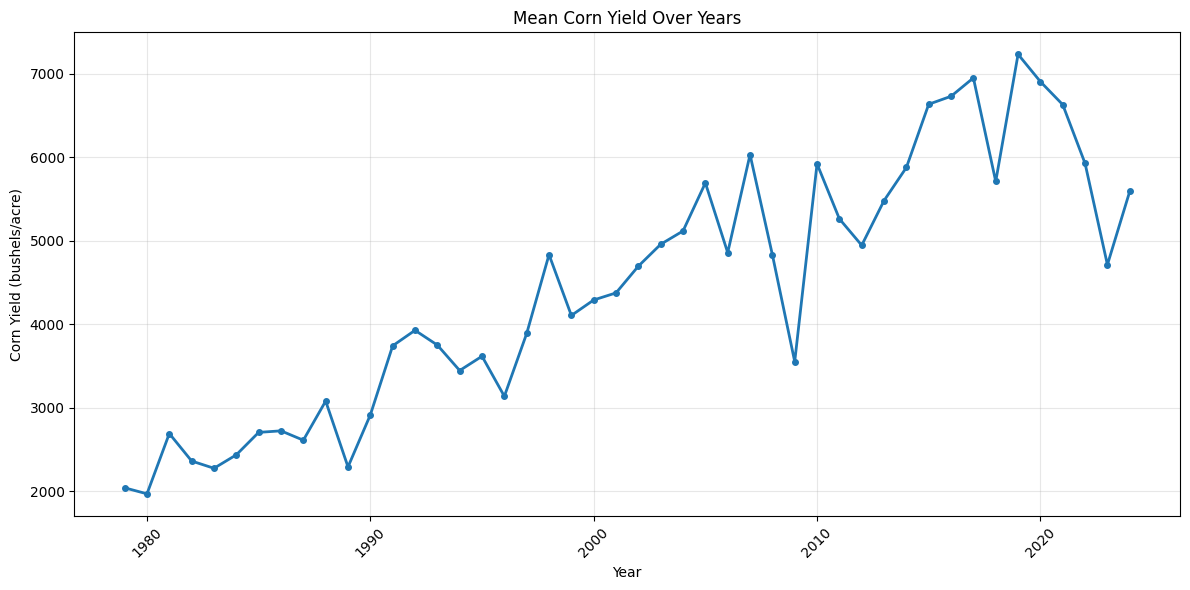

In [8]:
# Plot mean yield over the years
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(yearly_yields['year'], yearly_yields[crop_yield_col], marker='o', linewidth=2, markersize=4)
plt.title(f'Mean {CROP_TYPE.title()} Yield Over Years')
plt.xlabel('Year')
plt.ylabel(f'{CROP_TYPE.title()} Yield (bushels/acre)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
